In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [61]:
load_dir = "H_Env_Base_Pen_EnsNum=3_Test2"
exp_num = 5
env_num = 3

In [62]:
def load_by_expId_envId(load_dir, expId, envId):
    file_path = load_dir + "/" + str(expId) +"_SngleModel_env_+" +str(envId)+"_reward_logs.npy"
    print("file path = " + file_path)
    reward_log = np.load(file_path)
    return reward_log

In [63]:
test_log_1 = load_by_expId_envId(load_dir, 0, 0)

file path = H_Env_Base_Pen_EnsNum=3_Test2/0_SngleModel_env_+0_reward_logs.npy


In [64]:
def load_reward_by_envId(load_dir, exp_num, envId):
    res = []
    for expId in range(exp_num):
#         print(expId)
        cur_load = load_by_expId_envId(load_dir , expId, envId)
        res.append(cur_load)
    return res

In [65]:
env0_log = load_reward_by_envId(load_dir, exp_num, envId=0)
env1_log = load_reward_by_envId(load_dir, exp_num, envId=1)
env2_log = load_reward_by_envId(load_dir, exp_num, envId=2)

file path = H_Env_Base_Pen_EnsNum=3_Test2/0_SngleModel_env_+0_reward_logs.npy
file path = H_Env_Base_Pen_EnsNum=3_Test2/1_SngleModel_env_+0_reward_logs.npy
file path = H_Env_Base_Pen_EnsNum=3_Test2/2_SngleModel_env_+0_reward_logs.npy
file path = H_Env_Base_Pen_EnsNum=3_Test2/3_SngleModel_env_+0_reward_logs.npy
file path = H_Env_Base_Pen_EnsNum=3_Test2/4_SngleModel_env_+0_reward_logs.npy
file path = H_Env_Base_Pen_EnsNum=3_Test2/0_SngleModel_env_+1_reward_logs.npy
file path = H_Env_Base_Pen_EnsNum=3_Test2/1_SngleModel_env_+1_reward_logs.npy
file path = H_Env_Base_Pen_EnsNum=3_Test2/2_SngleModel_env_+1_reward_logs.npy
file path = H_Env_Base_Pen_EnsNum=3_Test2/3_SngleModel_env_+1_reward_logs.npy
file path = H_Env_Base_Pen_EnsNum=3_Test2/4_SngleModel_env_+1_reward_logs.npy
file path = H_Env_Base_Pen_EnsNum=3_Test2/0_SngleModel_env_+2_reward_logs.npy
file path = H_Env_Base_Pen_EnsNum=3_Test2/1_SngleModel_env_+2_reward_logs.npy
file path = H_Env_Base_Pen_EnsNum=3_Test2/2_SngleModel_env_+2_re

In [66]:
def load_all(load_dir, exp_num, env_num):
    all_reward = []
    for envId in range(env_num):
        env_log = load_reward_by_envId(load_dir, exp_num, envId)
        all_reward.append(env_log)
        
    return all_reward

In [67]:
all_reward_log = load_all(load_dir, exp_num, env_num)

file path = H_Env_Base_Pen_EnsNum=3_Test2/0_SngleModel_env_+0_reward_logs.npy
file path = H_Env_Base_Pen_EnsNum=3_Test2/1_SngleModel_env_+0_reward_logs.npy
file path = H_Env_Base_Pen_EnsNum=3_Test2/2_SngleModel_env_+0_reward_logs.npy
file path = H_Env_Base_Pen_EnsNum=3_Test2/3_SngleModel_env_+0_reward_logs.npy
file path = H_Env_Base_Pen_EnsNum=3_Test2/4_SngleModel_env_+0_reward_logs.npy
file path = H_Env_Base_Pen_EnsNum=3_Test2/0_SngleModel_env_+1_reward_logs.npy
file path = H_Env_Base_Pen_EnsNum=3_Test2/1_SngleModel_env_+1_reward_logs.npy
file path = H_Env_Base_Pen_EnsNum=3_Test2/2_SngleModel_env_+1_reward_logs.npy
file path = H_Env_Base_Pen_EnsNum=3_Test2/3_SngleModel_env_+1_reward_logs.npy
file path = H_Env_Base_Pen_EnsNum=3_Test2/4_SngleModel_env_+1_reward_logs.npy
file path = H_Env_Base_Pen_EnsNum=3_Test2/0_SngleModel_env_+2_reward_logs.npy
file path = H_Env_Base_Pen_EnsNum=3_Test2/1_SngleModel_env_+2_reward_logs.npy
file path = H_Env_Base_Pen_EnsNum=3_Test2/2_SngleModel_env_+2_re

In [68]:
def plot_all_experiments(rewards, env_id, plot_individual_envs=False):
    num_experiments = len(rewards)
    num_rounds, num_envs = rewards[0].shape

    all_rewards = np.array(rewards)
    
    # 计算每个环境的均值和方差
    mean_rewards = np.mean(all_rewards, axis=0)
    std_rewards = np.std(all_rewards, axis=0)
    
    # 计算所有环境的均值和方差
    avg_mean_rewards = np.mean(mean_rewards, axis=1)
    avg_std_rewards = np.std(mean_rewards, axis=1)
    
    # 打印每个环境的最终均值和方差
    print("Final mean rewards and standard deviations for each environment:")
    for env in range(num_envs):
        final_mean_reward = mean_rewards[-1, env]
        final_std_reward = std_rewards[-1, env]
        print(f"Environment {env + 1} - Final Mean Reward: {final_mean_reward:.2f}, Final Std Dev: {final_std_reward:.2f}")
    
    # 打印所有环境的平均均值和方差
    final_avg_mean_reward = avg_mean_rewards[-1]
    final_avg_std_reward = avg_std_rewards[-1]
    print(f"All Environments - Final Average Mean Reward: {final_avg_mean_reward:.2f}, Final Std Dev: {final_avg_std_reward:.2f}")
    
    if plot_individual_envs:
        for env in range(num_envs):
            plt.figure(figsize=(12, 8), dpi=100)
            plt.plot(mean_rewards[:, env], label=f'Environment {env + 1}', linewidth=2)
            plt.fill_between(range(num_rounds), mean_rewards[:, env] - std_rewards[:, env], mean_rewards[:, env] + std_rewards[:, env], alpha=0.2)
            
            plt.xlabel('Rounds', fontsize=14)
            plt.ylabel('Reward', fontsize=14)
            plt.title(f'Mean Rewards for Environment {env + 1}', fontsize=16)
            plt.legend(fontsize=12)
            plt.grid(True)
            plt.show()
        
        # 绘制平均值的图
        plt.figure(figsize=(12, 8), dpi=100)
        plt.plot(avg_mean_rewards, label='Average', linestyle='--', color='black', linewidth=2)
        plt.fill_between(range(num_rounds), avg_mean_rewards - avg_std_rewards, avg_mean_rewards + avg_std_rewards, color='black', alpha=0.2)
        
        plt.xlabel('Rounds', fontsize=14)
        plt.ylabel('Reward', fontsize=14)
        plt.title('Mean Rewards Across All Experiments', fontsize=16)
        plt.legend(fontsize=12)
        plt.grid(True)
        plt.show()

    # 绘制所有环境的均值和方差
    plt.figure(figsize=(12, 8), dpi=100)
    for env in range(num_envs):
        plt.plot(mean_rewards[:, env], label=f'Environment {env_id + 1}', linewidth=2)
        plt.fill_between(range(num_rounds), mean_rewards[:, env] - std_rewards[:, env], mean_rewards[:, env] + std_rewards[:, env], alpha=0.2)
    
    plt.plot(avg_mean_rewards, label='Average', linestyle='--', color='black', linewidth=2)
    plt.fill_between(range(num_rounds), avg_mean_rewards - avg_std_rewards, avg_mean_rewards + avg_std_rewards, color='black', alpha=0.2)

    plt.xlabel('Rounds', fontsize=14)
    plt.ylabel('Reward', fontsize=14)
    plt.title('Mean Rewards Across All Experiments', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

Final mean rewards and standard deviations for each environment:
Environment 1 - Final Mean Reward: -141.86, Final Std Dev: 17.22
Environment 2 - Final Mean Reward: -148.02, Final Std Dev: 24.26
Environment 3 - Final Mean Reward: -138.13, Final Std Dev: 20.83
All Environments - Final Average Mean Reward: -142.67, Final Std Dev: 4.08


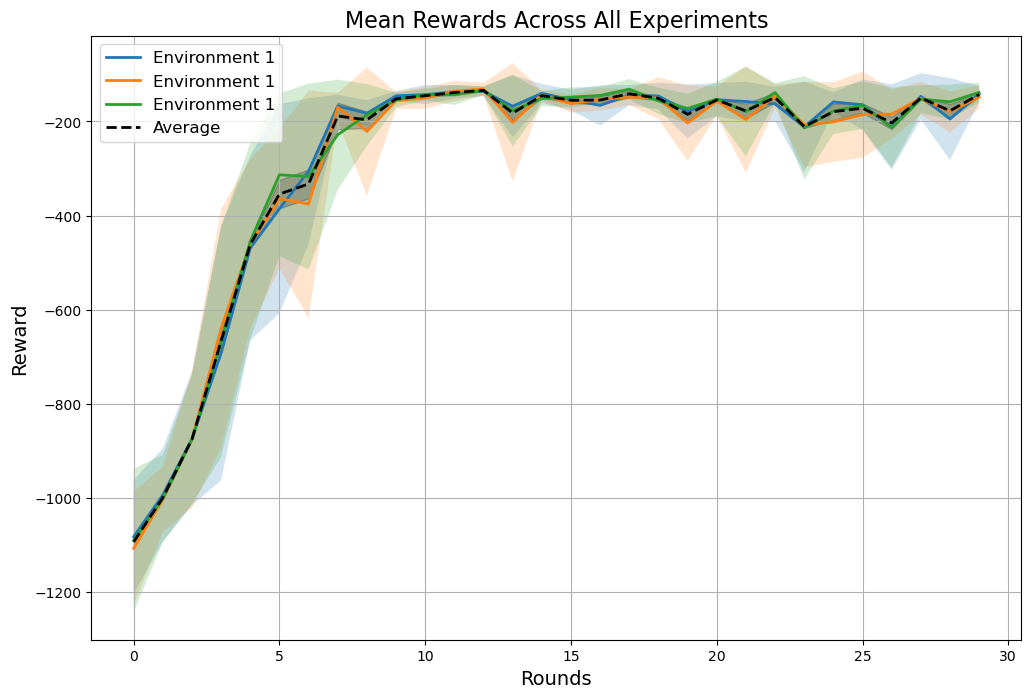

Final mean rewards and standard deviations for each environment:
Environment 1 - Final Mean Reward: -174.79, Final Std Dev: 17.09
Environment 2 - Final Mean Reward: -178.24, Final Std Dev: 32.45
Environment 3 - Final Mean Reward: -155.37, Final Std Dev: 20.38
All Environments - Final Average Mean Reward: -169.46, Final Std Dev: 10.07


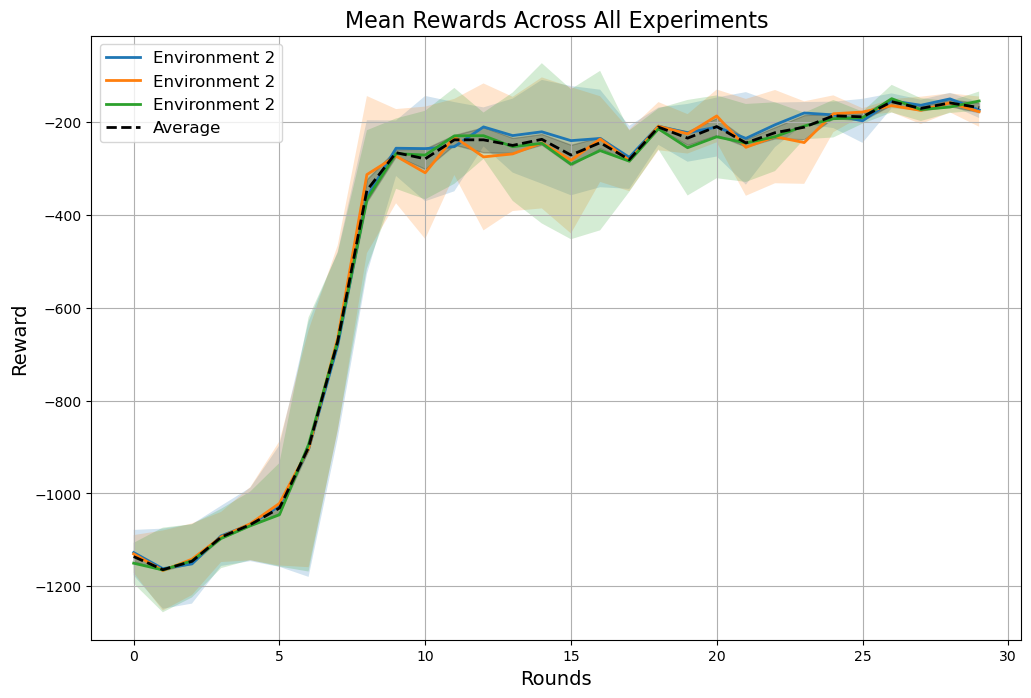

Final mean rewards and standard deviations for each environment:
Environment 1 - Final Mean Reward: -260.52, Final Std Dev: 69.05
Environment 2 - Final Mean Reward: -282.17, Final Std Dev: 83.78
Environment 3 - Final Mean Reward: -267.82, Final Std Dev: 76.72
All Environments - Final Average Mean Reward: -270.17, Final Std Dev: 8.99


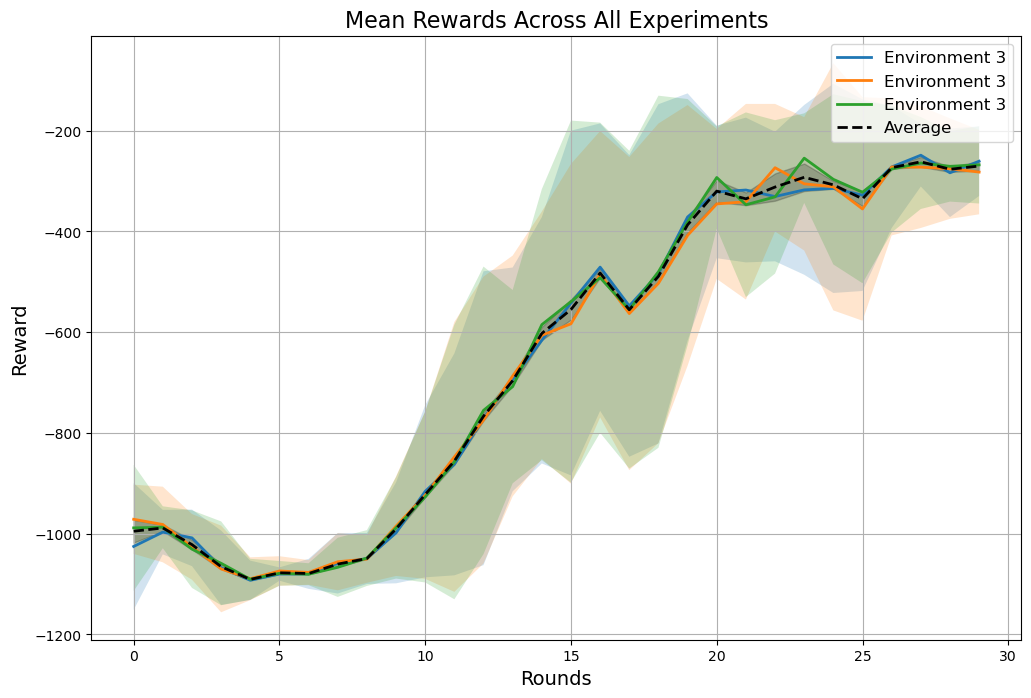

In [69]:
for envId in range(env_num):
    plot_all_experiments(all_reward_log[envId], env_id=envId, plot_individual_envs=False)

In [70]:
-(142 + 215 + 235)/3

-197.33333333333334

In [71]:
env0_log

[array([[-1272.66151591, -1327.7829517 , -1329.9382217 ],
        [ -969.92277986,  -965.87720871,  -972.07472789],
        [-1070.84923578, -1106.58850489, -1066.17983188],
        [-1207.61381796, -1099.74091374, -1126.03397063],
        [ -588.64641865,  -638.68803429,  -647.22708211],
        [ -270.90072504,  -374.08357139,  -281.11452502],
        [ -343.60902029,  -291.42346843,  -217.92898   ],
        [ -170.33400209,  -125.96280969,  -164.59144339],
        [ -160.9139054 ,  -134.27224592,  -153.15797605],
        [ -151.41693531,  -170.06573754,  -170.79772851],
        [ -158.36001626,  -151.80845891,  -150.68780081],
        [ -146.21908894,  -111.51172262,  -151.83868382],
        [ -139.94709101,  -119.86757181,  -147.42732844],
        [ -130.90205045,  -113.75596487,  -132.50294839],
        [ -147.03767161,  -133.50090372,  -141.19996012],
        [ -153.2984554 ,  -155.59396693,  -142.88578747],
        [ -161.58021515,  -139.22307904,  -127.46428746],
        [ -117

In [72]:
env0_log_avg = np.mean(np.array(env0_log), axis=2)
env0_log_avg

array([[-1310.1275631 ,  -969.29157215, -1081.20585752, -1144.46290078,
         -624.85384502,  -308.69960715,  -284.32048957,  -153.62941839,
         -149.44804246,  -164.09346712,  -153.61875866,  -136.52316513,
         -135.74733042,  -125.72032124,  -140.57951182,  -150.5927366 ,
         -142.75586055,  -131.68194351,  -122.85561851,  -132.66292145,
         -137.79142864,  -131.18851764,  -137.66845789,  -246.48249769,
         -130.57440261,  -140.90640623,  -117.71932112,  -150.59108558,
         -147.4378139 ,  -128.19480881],
       [ -999.27452416,  -965.93054228,  -825.23849904,  -394.92109013,
         -261.56235846,  -706.51793828,  -379.34664162,  -134.26341998,
         -346.19636024,  -139.03494831,  -123.44420543,  -123.77377051,
         -131.54430762,  -128.70188769,  -126.79541709,  -131.68511146,
         -137.02986989,  -122.92851198,  -128.86546587,  -225.32023691,
         -123.58716561,  -114.27547862,  -122.99120156,  -125.83662853,
         -137.38776178,

In [73]:
env1_log_avg = np.mean(np.array(env1_log), axis=2)
env1_log_avg

array([[-1166.50201258, -1251.75758914, -1247.37358199, -1165.27245066,
        -1182.64961064, -1189.57447874, -1160.24579249,  -967.60106029,
         -626.95139278,  -258.50517671,  -328.47761451,  -172.54101005,
         -175.53180722,  -170.16150804,  -166.70761478,  -532.15502466,
         -146.57739393,  -226.2457397 ,  -264.14564131,  -329.87374198,
         -162.37360264,  -175.24109712,  -333.58880529,  -285.24601694,
         -158.4250887 ,  -219.74173309,  -146.16327773,  -168.16506786,
         -142.49129933,  -177.57686452],
       [-1139.25381687, -1171.85537887, -1150.9387501 , -1113.75304478,
         -978.45809651,  -995.68208991,  -911.18661702,  -773.08605555,
         -390.9603165 ,  -366.687787  ,  -468.09164414,  -392.94412746,
         -377.19742792,  -455.53075002,  -519.48643541,  -315.02337336,
         -452.36536507,  -376.60882464,  -249.85186124,  -296.79149373,
         -257.61730728,  -171.61104527,  -165.90624169,  -244.52366879,
         -184.24140803,

In [74]:
env2_log_avg = np.mean(np.array(env2_log), axis=2)
env2_log_avg

array([[ -904.00429625,  -992.30396801, -1046.87773807, -1077.25448696,
        -1110.80546946, -1079.07600054, -1095.99533044, -1128.00662947,
        -1103.8738228 , -1128.63384633, -1149.23414888, -1114.55405511,
        -1050.72215394,  -869.36399435,  -939.10414971,  -999.1577348 ,
         -953.45879394,  -937.53192732,  -945.12592511,  -866.06002362,
         -489.64735293,  -610.29547194,  -219.68239575,  -375.45074694,
         -198.39758003,  -193.28272138,  -160.94277298,  -185.74569979,
         -187.08107084,  -193.54848064],
       [ -943.03224568,  -910.99914017,  -911.59851661,  -909.01047282,
        -1018.77130725, -1037.02954937, -1052.11884302, -1030.97424294,
        -1023.88448517,  -969.05994126,  -972.96060226,  -984.6084532 ,
         -967.77252171,  -901.69712093,  -779.49218141,  -911.49120754,
         -669.34028651,  -900.73781562,  -836.7900531 ,  -322.01599079,
         -282.36551935,  -220.99958307,  -208.43634886,  -209.06233084,
         -203.65712217,

In [75]:
# env0_log_avg = np.mean(np.array(env0_log)[1], axis=1)
# env1_log_avg = np.mean(np.array(env1_log)[0], axis=1)
# env2_log_avg = np.mean(np.array(env2_log)[0], axis=1)

In [76]:
all_reward_log = [env0_log_avg,env1_log_avg,env2_log_avg]

In [77]:
all_reward_log

[array([[-1310.1275631 ,  -969.29157215, -1081.20585752, -1144.46290078,
          -624.85384502,  -308.69960715,  -284.32048957,  -153.62941839,
          -149.44804246,  -164.09346712,  -153.61875866,  -136.52316513,
          -135.74733042,  -125.72032124,  -140.57951182,  -150.5927366 ,
          -142.75586055,  -131.68194351,  -122.85561851,  -132.66292145,
          -137.79142864,  -131.18851764,  -137.66845789,  -246.48249769,
          -130.57440261,  -140.90640623,  -117.71932112,  -150.59108558,
          -147.4378139 ,  -128.19480881],
        [ -999.27452416,  -965.93054228,  -825.23849904,  -394.92109013,
          -261.56235846,  -706.51793828,  -379.34664162,  -134.26341998,
          -346.19636024,  -139.03494831,  -123.44420543,  -123.77377051,
          -131.54430762,  -128.70188769,  -126.79541709,  -131.68511146,
          -137.02986989,  -122.92851198,  -128.86546587,  -225.32023691,
          -123.58716561,  -114.27547862,  -122.99120156,  -125.83662853,
         

In [78]:
save_dir = "Res_H_Env_Pen"
for envId in range(env_num):
    # 构建文件名
    file_name = f"Single_EnsNum=3_Env{envId}.npy"
    
    # 保存数据
    np.save(os.path.join(save_dir, file_name), all_reward_log[envId])